<a href="https://colab.research.google.com/github/nurfaizah19/3333210043_Nur-Faizah_Kelas-C/blob/main/3333210043_Nur_Faizah_Kelas_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

Perintah **import pandas as pd** digunakan untuk mengimpor modul Pandas ke dalam program Anda dan memberikan alias pd ke modul tersebut. Pandas adalah salah satu pustaka populer yang digunakan untuk analisis dan manipulasi data dalam Python.

Perintah **import numpy as np** digunakan untuk mengimpor modul NumPy ke dalam program Anda dan memberikan alias np ke modul tersebut. NumPy adalah pustaka yang sangat populer dalam bahasa pemrograman Python yang menyediakan dukungan untuk array dan operasi matematika yang efisien.

Perintah **import matplotlib.pyplot as plt **digunakan untuk mengimpor modul pyplot dari pustaka matplotlib ke dalam program Anda dan memberikan alias plt ke modul tersebut. matplotlib.pyplot adalah submodul dari pustaka matplotlib yang menyediakan berbagai fungsi untuk membuat visualisasi grafik dan plot dalam Python. Dengan menggunakan pyplot, kita dapat membuat grafik garis, histogram, scatter plot, bar plot, dan banyak lagi.

Perintah **import seaborn as sns **digunakan untuk mengimpor modul Seaborn ke dalam program Anda dan memberikan alias sns ke modul tersebut. Seaborn adalah pustaka visualisasi data yang dibangun di atas matplotlib. Seaborn menyediakan antarmuka tingkat tinggi yang lebih mudah digunakan untuk membuat plot yang menarik dan informatif. Pustaka ini digunakan terutama dalam analisis data dan tugas visualisasi untuk menghasilkan plot yang lebih mudah dibaca dan ditingkatkan secara estetika.

Perintah **import math** digunakan untuk mengimpor modul math ke dalam program yang kita miliki. Modul math adalah salah satu modul bawaan Python yang menyediakan berbagai fungsi matematika yang umum digunakan. Setelah mengimpor modul math menggunakan perintah import math, kita dapat menggunakan berbagai fungsi dan konstanta matematika yang tersedia di dalamnya. Modul math juga menyediakan fungsi trigonometri, logaritma, fungsi eksponensial, fungsi trigonometri invers, dan banyak lagi.

Perintah **import datetime** digunakan untuk mengimpor modul datetime ke dalam program yang kita miliki. Modul datetime adalah modul bawaan Python yang menyediakan kelas dan fungsi untuk bekerja dengan tanggal, waktu, dan kombinasi keduanya. Modul datetime juga menyediakan fungsi dan metode untuk melakukan operasi terkait tanggal dan waktu, seperti perbedaan tanggal, penambahan atau pengurangan tanggal dan waktu, penguraian string ke objek datetime, dan sebagainya.

**%matplotlib inline **adalah magic command dalam lingkungan Jupyter Notebook yang digunakan untuk mengaktifkan tampilan plot langsung di dalam notebook. Saat menjalankan %matplotlib inline, plot yang dibuat menggunakan pustaka visualisasi seperti Matplotlib akan ditampilkan secara langsung di notebook setelah kode sel plot dijalankan. Ini memungkinkan kita untuk melihat plot secara interaktif di dalam notebook, tanpa perlu menulis kode tambahan untuk menampilkan plot secara terpisah.



**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/jillanisofttech/tesla-stock-price

Untuk mengimport dataset dari google drive dapat menggunakan syntax berikut:

In [ ]:
# https://drive.google.com/file/d/1vcwSHHhUNds4mIgwr7vc3Q0y5RVvpuER/view?usp=sharing

!gdown 1vcwSHHhUNds4mIgwr7vc3Q0y5RVvpuER

Downloading...
From: https://drive.google.com/uc?id=1vcwSHHhUNds4mIgwr7vc3Q0y5RVvpuER
To: /content/TSLA.csv
100% 67.9k/67.9k [00:00<00:00, 110MB/s]


In [ ]:
train_data = pd.read_csv('/content/TSLA.csv')
train_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


Peritah **train_data = pd.read_csv('/content/TSLA.csv')** digunakan untuk membaca file CSV dengan nama "TSLA.csv" dan menyimpan datanya ke dalam variabel train_data. Modul yang digunakan adalah pandas dan diimpor dengan alias pd. Fungsi read_csv() dari modul pandas digunakan untuk membaca file CSV dan mengonversinya menjadi sebuah objek DataFrame.

Setelah melakukan pembacaan file CSV dan menyimpan datanya ke dalam variabel train_data, kita dapat menggunakan metode head() untuk melihat beberapa baris pertama dari DataFrame tersebut. Metode head() mengembalikan sejumlah baris teratas dari DataFrame.

Outputnya akan menampilkan beberapa baris pertama dari DataFrame train_data, yang berisi data dari file CSV "TSLA.csv".

Check missing values

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       639 non-null    object 
 1   High       639 non-null    float64
 2   Low        639 non-null    float64
 3   Open       639 non-null    float64
 4   Close      639 non-null    float64
 5   Volume     639 non-null    float64
 6   Adj Close  639 non-null    float64
dtypes: float64(6), object(1)
memory usage: 35.1+ KB


Perintah **train_data.info()** adalah metode yang digunakan pada objek DataFrame untuk menampilkan informasi tentang struktur data, tipe kolom, dan jumlah nilai non-null di setiap kolom.

Metode info() memberikan ringkasan singkat tentang DataFrame, termasuk jumlah total baris dan kolom, nama kolom dan tipe data masing-masing kolom, jumlah nilai non-null di setiap kolom, da penggunaan memori oleh DataFrame.

Outputnya akan menampilkan informasi seperti jumlah kolom, tipe data kolom, dan jumlah nilai non-null di setiap kolom.

Output diatas memberikan informasi bahwa DataFrame train_data memiliki 639 baris dan 7 kolom. Kolom "Date" memiliki tipe data objek (string), sedangkan kolom "High", "Low", "Open", "Close", "Volume" dan "Adj Close" memiliki tipe data float64. Semua kolom memiliki 639 nilai non-null dan total memori yang digunakan oleh DataFrame sebesar 35.1+ KB



Check statistic vales for every features

In [ ]:
train_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,639.000000,639.000000,639.000000,639.000000,6.390000e+02,639.000000
mean,543.362885,517.883537,531.004088,531.298030,4.819130e+07,531.298030
std,340.837426,325.395864,333.534448,333.362040,3.579030e+07,333.362040
min,46.896000,44.855999,45.959999,46.285999,9.800600e+06,46.285999
25%,170.258003,162.379997,167.349998,164.783005,2.392195e+07,164.783005
50%,620.409973,595.500000,603.880005,605.130005,3.448900e+07,605.130005
75%,796.584991,767.744995,779.445007,781.304993,6.329725e+07,781.304993
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08,1229.910034


Perintah **train_data.describe()** adalah metode yang digunakan pada objek DataFrame untuk menghasilkan ringkasan statistik deskriptif dari data numerik dalam DataFrame. Metode describe() memberikan informasi seperti jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum untuk setiap kolom numerik.

Outputnya akan menampilkan ringkasan statistik deskriptif untuk setiap kolom numerik dalam DataFrame train_data.

Output diatas memberikan informasi statistik deskriptif seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50% atau kuartil kedua), kuartil ketiga (75%), dan nilai maksimum (max) untuk setiap kolom numerik.

Handle datetime data for time series

In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


Langkah-langkah berikut akan mengubah kolom 'Date' dalam DataFrame train_data menjadi tipe data datetime dan mengatur kolom tersebut sebagai indeks DataFrame:

Perintah **train_data['Date']** = pd.to_datetime(train_data['Date']): Pada langkah ini, menggunakan fungsi pd.to_datetime(), kolom 'Date' dalam DataFrame train_data diubah menjadi tipe data datetime. Fungsi ini mengonversi nilai-nilai dalam kolom 'Date' menjadi objek datetime yang dapat digunakan untuk operasi berbasis tanggal dan waktu.

Perintah **train_data.set_index('Date', inplace=True)**: Pada langkah ini, menggunakan metode set_index(), kolom 'Date' diatur sebagai indeks DataFrame. Dengan menggunakan inplace=True, perubahan ini dilakukan secara langsung pada DataFrame train_data, yaitu kolom 'Date' dihapus dari kolom-kolom data dan digunakan sebagai indeks DataFrame.

Perintah **train_data.head()**: Pada langkah ini, menggunakan metode head(), ditampilkan beberapa baris pertama dari DataFrame train_data setelah perubahan indeks dilakukan.

Outputnya akan menampilkan beberapa baris pertama dari DataFrame train_data setelah kolom 'Date' diubah menjadi tipe data datetime dan diatur sebagai indeks DataFrame.

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

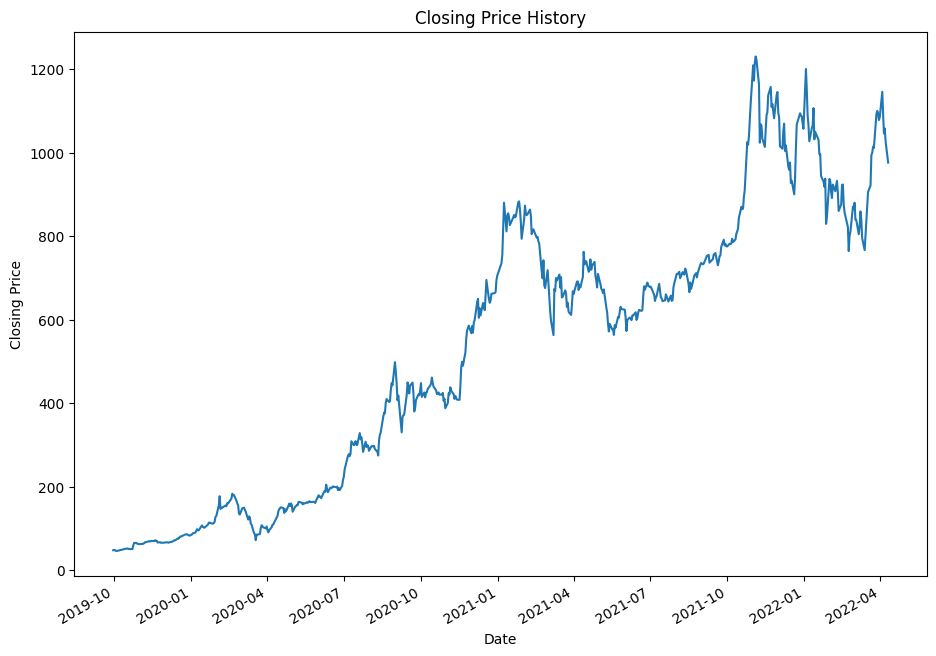

In [ ]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Perintah **plt.figure(figsize=(11, 8))**: Baris ini membuat objek gambar baru dengan ukuran 11 inci (lebar) dan 8 inci (tinggi). Fungsi figure() dari Matplotlib digunakan untuk membuat objek gambar yang akan berisi plot.

Perintah **train_data['Adj Close'].plot()**: Baris ini menggunakan metode plot() pada kolom 'Adj Close' dalam DataFrame train_data untuk membuat plot garis dari data tersebut. Ini akan menghasilkan grafik garis yang menunjukkan perubahan harga penutupan dari waktu ke waktu.

Perintah **plt.title('Closing Price History')**: Baris ini menambahkan judul "Closing Price History" ke plot menggunakan fungsi title() dari Matplotlib.

Perintah **plt.xlabel('Date')**: Baris ini menambahkan label "Date" pada sumbu-x plot menggunakan fungsi xlabel() dari Matplotlib.

Perintah **plt.ylabel('Closing Price')**: Baris ini menambahkan label "Closing Price" pada sumbu-y plot menggunakan fungsi ylabel() dari Matplotlib.

Perintah **plt.show()**: Baris ini menampilkan plot yang telah dibuat menggunakan fungsi show() dari Matplotlib.

Outputnya akan menampilkan plot garis dari data harga penutupan (kolom 'Adj Close') dengan judul, label sumbu-x, dan label sumbu-y yang sesuai.

Output diatas menampilkan plot garis dari data harga penutupan (kolom 'Adj Close') yang berjudul Closing Price History, dengan label sumbu-x nya yaitu Date dan label sumbu-y nya yaitu Closing Price.

<Figure size 1600x800 with 0 Axes>

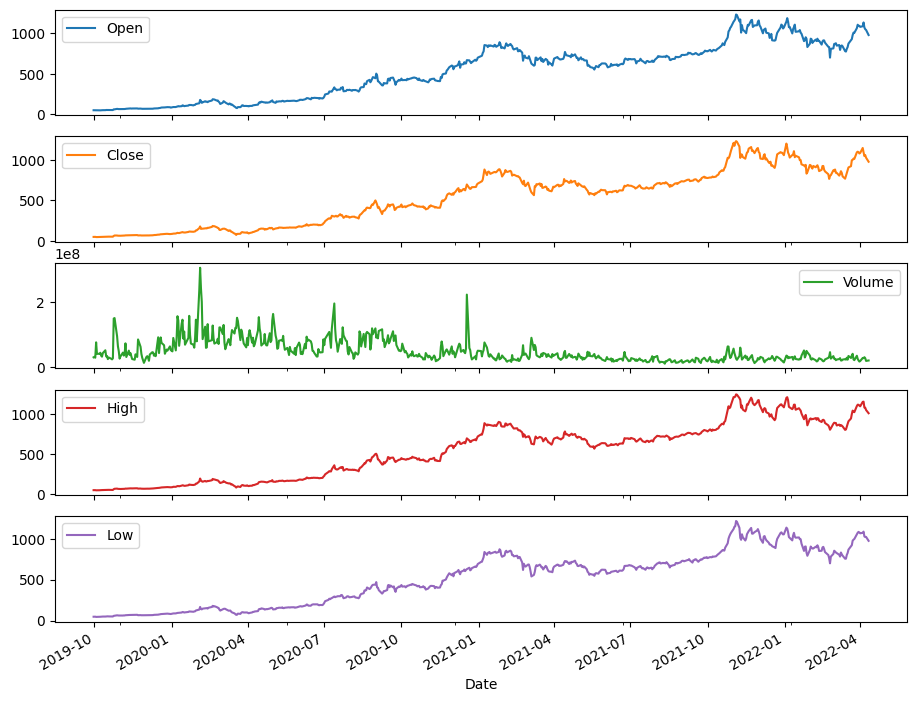

In [ ]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Perintah **plt.figure(figsize=(16, 8))**: Baris ini membuat objek gambar baru dengan ukuran 16 inci (lebar) dan 8 inci (tinggi). Fungsi figure() dari Matplotlib digunakan untuk membuat objek gambar yang akan berisi subplot.

Perintah **cols = ['Open', 'Close', 'Volume', 'High', 'Low']**: Baris ini mendefinisikan daftar kolom yang akan digunakan dalam plot. Dalam dataset ini, daftar kolom yang dipilih adalah 'Open', 'Close', 'Volume', 'High', dan 'Low'.

Perintah **axes = train_data[cols].plot(figsize=(11, 9), subplots=True)**: Baris ini membuat subplot dalam satu gambar dengan menggunakan metode plot() pada kolom-kolom yang telah dipilih dari DataFrame train_data. Parameter figsize=(11, 9) digunakan untuk mengatur ukuran setiap subplot dalam gambar. Parameter subplots=True mengindikasikan bahwa setiap kolom akan ditampilkan dalam subplot terpisah.

Perintah **plt.show()**: Baris ini menampilkan gambar subplot yang telah dibuat menggunakan fungsi show() dari Matplotlib.

Outputnya akan menampilkan beberapa subplot dalam satu gambar, masing-masing menunjukkan grafik garis dari kolom-kolom yang dipilih dari DataFrame train_data.

Outputnya diatas menampilkan beberapa subplot dalam satu gambar, masing-masing menunjukkan grafik garis dari kolom-kolom yang dipilih dari DataFrame train_data yaitu kolom Open, Close, Volume, High, dan Low.

In [ ]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Perintah train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0 **teks tebal**: Baris ini menambahkan kolom baru 'HL_PCT' ke DataFrame train_data. Nilai pada kolom 'HL_PCT' dihitung dengan mengurangi harga terendah ('Low') dari harga tertinggi ('High') dan kemudian membagi hasilnya dengan harga terendah ('Low'). Hasilnya dikalikan dengan 100.0 untuk mendapatkan persentase perubahan harga tertinggi-terendah.

Perintah train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0 **teks tebal**: Baris ini menambahkan kolom baru 'PCT_change' ke DataFrame train_data. Nilai pada kolom 'PCT_change' dihitung dengan mengurangi harga pembukaan ('Open') dari harga penutupan ('Close') dan kemudian membagi hasilnya dengan harga pembukaan ('Open'). Hasilnya dikalikan dengan 100.0 untuk mendapatkan persentase perubahan harga penutupan dibandingkan dengan harga pembukaan.

Setelah kode di *running*, DataFrame train_data akan memiliki dua kolom baru, 'HL_PCT' dan 'PCT_change', yang berisi persentase perubahan harga tertinggi-terendah dan persentase perubahan harga penutupan dibandingkan dengan harga pembukaan, masing-masing.

In [ ]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

Perintah df = train_data[['HL_PCT', 'PCT_change', 'Adj Close', 'Volume']]: Baris ini membuat DataFrame baru yang disebut df dengan menggunakan tanda kurung ganda [['HL_PCT', 'PCT_change', 'Adj Close', 'Volume']]. Ini adalah cara untuk memilih beberapa kolom dari DataFrame train_data dan menyimpannya ke dalam DataFrame baru df.

Kolom-kolom yang dipilih adalah:
*    'HL_PCT': Kolom yang mengandung persentase
perubahan harga tertinggi-terendah.
*   'PCT_change': Kolom yang mengandung persentase perubahan harga penutupan dibandingkan dengan harga pembukaan.
*   'Adj Close': Kolom yang mengandung harga penutupan yang disesuaikan (adjusted closing price).
*   'Volume': Kolom yang mengandung volume perdagangan.





In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

32


<ipython-input-13-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


Perintah **forecast_out = int(math.ceil(0.05 * len(df)))**: Baris ini menghitung jumlah baris yang akan digeser (shifted) untuk membuat kolom 'label'. Dalam hal ini, menggunakan rumus 0.05 * len(df) untuk mendapatkan 5% dari keseluruhan dataset. Fungsi math.ceil() digunakan untuk membulatkan ke atas ke bilangan bulat terdekat. Nilai yang dihasilkan kemudian disimpan dalam variabel forecast_out.

Perintah **print(forecast_out)**: Baris ini mencetak nilai forecast_out yang telah dihitung sebelumnya. Ini digunakan untuk mengetahui berapa banyak baris yang akan digeser.

Perintah **df['label'] = df['Adj Close'].shift(-forecast_out)**: Baris ini membuat kolom baru 'label' dalam DataFrame df dengan menggunakan metode shift() pada kolom 'Adj Close'. Dalam hal ini, menggunakan -forecast_out sebagai argumen untuk menggeser nilai 'Adj Close' ke atas sebanyak forecast_out baris. Dengan melakukan pergeseran ini, nilai 'Adj Close' pada baris yang diprediksi akan menjadi nilai target yang akan diprediksi.

Setelah kode di *running*, DataFrame df akan memiliki kolom baru 'label' yang berisi nilai 'Adj Close' yang telah digeser (shifted) ke atas sebanyak forecast_out baris. Kolom 'label' ini akan menjadi nilai target yang akan diprediksi dalam proses pemodelan atau ramalan (forecasting).








In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

Perintah **from sklearn.preprocessing import StandardScaler** digunakan untuk mengimpor kelas StandardScaler dari pustaka sklearn.preprocessing dalam Python. StandardScaler adalah salah satu metode pra-pemrosesan data yang populer dalam pembelajaran mesin (machine learning). Ini digunakan untuk melakukan normalisasi atau penskalaan fitur-fitur numerik dalam dataset.

Perintah **from sklearn.linear_model import LinearRegression, Ridge** digunakan untuk mengimpor kelas LinearRegression dan Ridge dari pustaka sklearn.linear_model dalam Python LinearRegression adalah kelas yang digunakan untuk membangun model regresi linier dalam pembelajaran mesin. Sedangkan, Ridge adalah kelas yang digunakan untuk membangun model regresi Ridge dalam pembelajaran mesin.

Perintah **from sklearn.ensemble import RandomForestRegressor** digunakan untuk mengimpor kelas RandomForestRegressor dari pustaka sklearn.ensemble dalam Python. RandomForestRegressor adalah kelas yang digunakan untuk membangun model regresi menggunakan algoritma Random Forest dalam pembelajaran mesin.

Perintah **from sklearn.svm import SVR** digunakan untuk mengimpor kelas SVR dari pustaka sklearn.svm dalam Python. SVR adalah kelas yang mengimplementasikan Support Vector Regression dalam pembelajaran mesin.
Support Vector Regression adalah metode regresi yang menggunakan Support Vector Machines (SVM) untuk memprediksi nilai variabel dependen berdasarkan fitur-fitur yang diberikan.

Perintah **from sklearn.model_selection import train_test_split** digunakan untuk mengimpor fungsi train_test_split dari pustaka sklearn.model_selection. train_test_split adalah fungsi yang digunakan untuk membagi dataset menjadi subset pelatihan dan subset pengujian.

Perintah **from sklearn.metrics import mean_squared_log_error** digunakan untuk mengimpor fungsi mean_squared_log_error dari pustaka sklearn.metrics. mean_squared_log_error adalah fungsi yang menghitung mean squared log error (MSLE) antara nilai aktual dan nilai yang diprediksi.

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-15-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Perintah **scaler = StandardScaler()**: Membuat objek StandardScaler dengan nama scaler.

Perintah **X = np.array(df.drop(['label'], 1))**: Mengambil data dari dataframe df kecuali kolom 'label'dan mengubahnya menjadi array numpy dan menyimpannya dalam variabel X.

Perintah **scaler.fit(X)**: Menggunakan objek scaler untuk menyesuaikan (fit) skala data dan menghitung rata-rata dan simpangan baku dari setiap fitur dalam X.

Perintah **X = scaler.transform(X)**: Menggunakan objek scaler untuk mentransformasikan (mengubah skala) data dalam X sesuai dengan rata-rata dan simpangan baku yang telah dihitung sebelumnya dan menghasilkan data yang telah dinormalisasi atau dipenskalaan standar, di mana setiap fitur memiliki rata-rata nol dan simpangan baku satu.

In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

Perintah **X_Predictions = X[-forecast_out:]**: Mengambil forecast_out jumlah baris terakhir dari array X dan menyimpannya dalam variabel X_Predictions dan data ini akan digunakan untuk melakukan prediksi di masa depan.

Perintah **X = X[:-forecast_out]**: Mengambil semua baris dari array X kecuali forecast_out jumlah baris terakhir dan data ini yang akan digunakan untuk melatih (training) model.

In [ ]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-17-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Perintah **df.dropna(inplace=True)**: Memanggil metode dropna() pada dataframe df untuk menghapus baris yang mengandung nilai yang hilang (NaN).
inplace=True digunakan untuk mengubah dataframe df secara langsung tanpa mengembalikan dataframe baru.

Perintah **y = np.array(df['label'])**: Mengambil kolom 'label' dari dataframe df dan mengubahnya menjadi array numpy. Kemudian, menyimpan array tersebut dalam variabel y.Ini menghasilkan array y yang berisi nilai target yang akan diprediksi oleh model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Berikut adalah penjelasan tentang setiap variabel yang dihasilkan dari pemisahan data:
X_train merupakan subset dari data X yang digunakan sebagai data pelatihan. Variabel ini akan berisi sebagian besar data X yang akan digunakan untuk melatih model.

**X_test** merupakan subset dari data X yang digunakan sebagai data pengujian. Variabel ini akan berisi sebagian kecil data X yang digunakan untuk menguji kinerja model.

**y_train** merupakan subset dari data y yang sesuai dengan X_train. Variabel ini akan berisi nilai target yang akan digunakan sebagai data pelatihan.

**y_test** merupakan subset dari data y yang sesuai dengan X_test. Variabel ini akan berisi nilai target yang akan digunakan sebagai data pengujian.

Parameter yang digunakan dalam fungsi train_test_split adalah sebagai berikut:

**X**: Data yang akan dibagi menjadi subset pelatihan dan pengujian.

**y**: Nilai target yang sesuai dengan data X.

**test_size**: Ukuran subset pengujian yang ingin ditetapkan sebagai proporsi dari data keseluruhan. Dalam contoh ini, test_size=0.2 berarti 20% data akan digunakan sebagai data pengujian.

**random_state**: Menentukan seed untuk menghasilkan pemisahan data yang sama setiap kali kode dijalankan. Dalam contoh ini, random_state=42 digunakan untuk memastikan reproduktibilitas pemisahan data.


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

Perintah **lr = LinearRegression()**: Membuat objek model regresi linear menggunakan kelas LinearRegression() dari pustaka sklearn.linear_model. Variabel lr akan digunakan untuk merepresentasikan model regresi linear yang akan dilatih dan diuji.

Perintah **lr.fit(X_train, y_train)**: Melatih model regresi linear (lr) menggunakan subset pelatihan X_train dan y_train. Metode fit() digunakan untuk menyesuaikan model dengan data pelatihan, sehingga model dapat belajar dari pola dan hubungan dalam data.

Perintah **lr_confidence = lr.score(X_test, y_test)**: Menggunakan model regresi linear yang telah dilatih (lr) untuk melakukan prediksi pada subset pengujian X_test. Metode score() digunakan untuk menghitung koefisien determinasi (R-squared) antara nilai aktual (y_test) dan nilai yang diprediksi oleh model.
Koefisien determinasi mengukur seberapa baik model cocok dengan data pengujian, dengan nilai maksimum 1.0 yang menunjukkan kecocokan sempurna.


In [ ]:
lr_confidence

0.847098459412723

**lr_confidence** pada python merupakan nilai skor (koefisien determinasi) yang dihasilkan oleh model regresi linear terhadap subset pengujian (**X_test** dan **y_test**). Skor tersebut menunjukkan seberapa baik model dapat menjelaskan variasi dalam data pengujian.

Koefisien determinasi (R-squared) adalah pengukuran yang berkisar antara 0 hingga 1. Nilai 1.0 menunjukkan kecocokan sempurna, yang berarti model dapat menjelaskan seluruh variasi dalam data pengujian. Nilai yang lebih rendah menunjukkan bahwa model memiliki keterbatasan dalam menjelaskan variasi data.

Dengan kata lain, semakin tinggi nilai **lr_confidence**, semakin baik model regresi linear dapat memprediksi nilai target (**y**) berdasarkan fitur-fitur (**X**) pada subset pengujian. Nilai yang mendekati 1.0 menunjukkan bahwa model memiliki kinerja yang baik dalam mempelajari pola dan hubungan dalam data pelatihan, serta mengeneralisasikan pengetahuannya untuk melakukan prediksi pada data pengujian.

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

Perintah **rf = RandomForestRegressor()**: Membuat objek model RandomForestRegressor menggunakan kelas RandomForestRegressor() dari pustaka sklearn.ensemble. Variabel rf akan digunakan untuk merepresentasikan model RandomForestRegressor yang akan dilatih dan diuji.

Perintah **rf.fit(X_train, y_train)**: Melatih model RandomForestRegressor (rf) menggunakan subset pelatihan X_train dan y_train.
Metode fit() digunakan untuk menyesuaikan model dengan data pelatihan, sehingga model dapat belajar dari pola dan hubungan dalam data.

Perintah** rf_confidence = rf.score(X_test, y_test)**: Menggunakan model RandomForestRegressor yang telah dilatih (rf) untuk melakukan prediksi pada subset pengujian X_test. Metode score() digunakan untuk menghitung skor (koefisien determinasi) antara nilai aktual y_test dan nilai yang diprediksi oleh model. Skor yang dihasilkan menunjukkan seberapa baik model RandomForestRegressor dapat menjelaskan variasi dalam data pengujian.

In [ ]:
rf_confidence

0.9127116641565819

**rf_confidence** pada Python merupakan skor (koefisien determinasi) yang dihasilkan oleh model RandomForestRegressor terhadap subset pengujian (X_test dan y_test). Skor tersebut mengindikasikan seberapa baik model dapat menjelaskan variasi dalam data pengujian.

Skor atau koefisien determinasi (R-squared) berkisar antara 0 hingga 1. Nilai 1.0 menunjukkan kecocokan sempurna, yang berarti model dapat menjelaskan seluruh variasi dalam data pengujian. Nilai yang lebih rendah menunjukkan bahwa model memiliki keterbatasan dalam menjelaskan variasi data.

Dengan kata lain, semakin tinggi nilai **rf_confidence**, semakin baik model RandomForestRegressor dapat memprediksi nilai target (y) berdasarkan fitur-fitur (X) pada subset pengujian. Nilai yang mendekati 1.0 menunjukkan bahwa model memiliki kinerja yang baik dalam mempelajari pola dan hubungan dalam data pelatihan, serta mengeneralisasikan pengetahuannya untuk melakukan prediksi pada data pengujian.






In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-23-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-23-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-23-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Perintah **last_date = df.index[-1]**: Mengambil tanggal terakhir (last_date) dari indeks dataframe df. Dalam konteks ini, diasumsikan bahwa indeks dataframe df adalah tanggal (datetime).

Perintah **last_unix = last_date.timestamp()**: Mengonversi last_date ke waktu dalam detik (timestamp). Variabel last_unix akan berisi waktu dalam detik terhitung sejak epoch (misalnya, 1 Januari 1970).

Perintah **one_day = 86400**: Mendefinisikan jumlah detik dalam satu hari (86400 detik).

Perintah **next_unix = last_unix + one_day**: Menghitung waktu dalam detik untuk hari berikutnya (next_unix) berdasarkan last_unix dan one_day. Ini akan digunakan untuk menetapkan indeks untuk data prediksi yang akan ditambahkan ke dataframe df.

Perintah **forecast_set = rf.predict(X_Predictions)**: Menggunakan model RandomForestRegressor (rf) untuk melakukan prediksi pada data X_Predictions.
X_Predictions adalah data yang akan diprediksi.

Perintah **df['Forecast'] = np.nan**: Menambahkan kolom 'Forecast' ke dataframe df dengan nilai NaN untuk semua baris.

Perintah **Loop for i in forecast_set:**: Iterasi melalui setiap nilai dalam forecast_set, yaitu hasil prediksi model.

Perintah **next_date = datetime.datetime.fromtimestamp(next_unix)**: Mengonversi next_unix ke objek datetime.
next_date akan mewakili tanggal berikutnya setelah last_date.

Perintah **next_unix += 86400**: Menambahkan jumlah detik dalam satu hari (86400 detik) ke next_unix untuk mengatur indeks untuk hari berikutnya.

Perintah **df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]**: Menambahkan baris baru ke dataframe df pada indeks next_date. Nilai kolom 'Forecast' untuk baris tersebut diisi dengan nilai prediksi (i) dan kolom lainnya diisi dengan NaN.

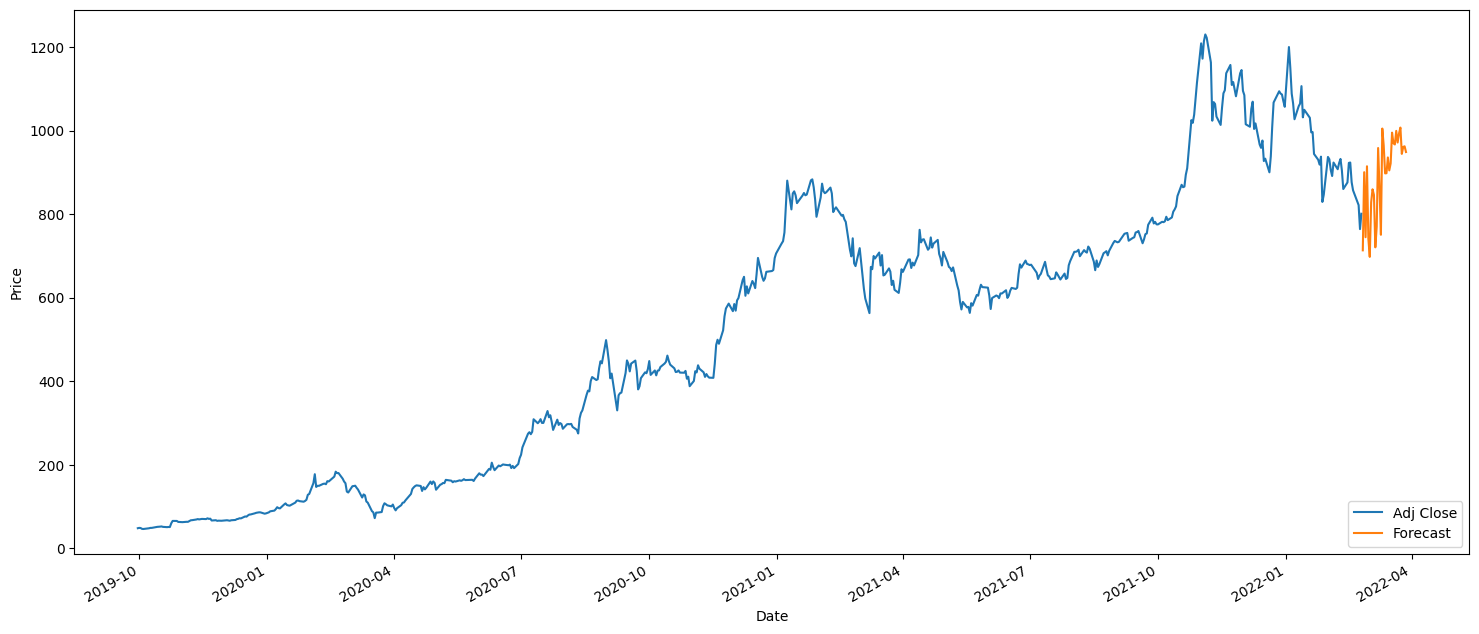

In [ ]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Perintah **plt.figure(figsize=(18, 8))**: Mengatur ukuran gambar plot dengan lebar 18 dan tinggi 8 menggunakan figsize.

Perintah **df['Adj Close'].plot()**: Membuat plot garis untuk kolom 'Adj Close' dari dataframe df. Ini akan menampilkan tren harga penutupan aktual dari dataset.

Perintah **df['Forecast'].plot()**: Membuat plot garis untuk kolom 'Forecast' dari dataframe df. Ini akan menampilkan tren harga penutupan yang diprediksi oleh model.

Perintah **plt.legend(loc=4)**: Menampilkan legenda pada plot dengan lokasi di kanan bawah (loc=4). Legenda akan memberikan informasi tentang kolom 'Adj Close' dan 'Forecast'.

Perintah **plt.xlabel('Date')**: Menetapkan label sumbu x pada plot sebagai 'Date' (tanggal). Ini akan memberikan keterangan tentang sumbu x pada plot.

Perintah **plt.ylabel('Price')**: Menetapkan label sumbu y pada plot sebagai 'Price' (harga). Ini akan memberikan keterangan tentang sumbu y pada plot.

Perintah **plt.show()**: Menampilkan plot yang telah dibuat.

Dengan kode ini, plot akan menampilkan tren harga penutupan aktual (Adj Close) dan tren harga penutupan yang diprediksi (Forecast) dalam satu gambar. Legend akan memberikan informasi tentang kedua tren tersebut, dan sumbu x dan sumbu y akan diberi label berturut turut yaitu Date dan Price.

## Clustering

<ipython-input-25-2ff176d9cd33>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


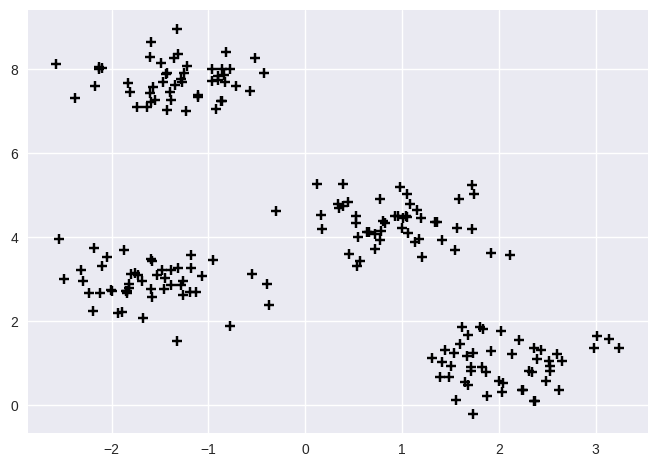

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('seaborn')
x, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5,shuffle=True, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c='k', marker='+', s=50)
plt.show()


Perintah **import matplotlib.pyplot as plt**: Mengimpor pustaka matplotlib untuk membuat plot.

Perintah **from sklearn.datasets import make_blobs**: Mengimpor fungsi make_blobs dari modul sklearn.datasets. Fungsi ini digunakan untuk membuat dataset buatan dengan kelompok-kelompok yang terdefinisi dengan jelas (blobs).

Perintah **plt.style.use('seaborn')**: Mengatur gaya plot menjadi 'seaborn'. Ini akan memberikan tampilan yang konsisten dengan gaya seaborn pada plot yang akan dibuat.

Perintah **x, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)**: Membuat dataset buatan menggunakan fungsi make_blobs.
Argumen-argumen yang diberikan menentukan jumlah sampel (n_samples), jumlah fitur (n_features), jumlah pusat kelompok (centers), standar deviasi klaster (cluster_std), apakah data diacak (shuffle), dan nilai seed acak (random_state).

Perintah **plt.scatter(x[:, 0], x[:, 1], c='k', marker='+', s=50)**: Membuat plot sebaran data dengan menggunakan plt.scatter.
Argumen pertama (x[:, 0]) adalah nilai x dari dataset. Argumen kedua (x[:, 1]) adalah nilai y dari dataset. Argumen c='k' mengatur warna titik menjadi hitam (k adalah kode warna untuk hitam). Argumen marker='+' mengatur bentuk marker menjadi '+'. Argumen s=50 mengatur ukuran marker menjadi 50.

Perintah **plt.show()**: Menampilkan plot yang telah dibuat.

In [ ]:
y

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

Variabel **'y'** biasanya merupakan array atau serangkaian nilai yang sesuai dengan setiap sampel data.

**1.1 K-means**
1- Randomly select centroids (center of cluster) for each cluster.
2- Calculate the distance of all data points to the centroids.
3- Assign data points to the closest cluster.
4- Find the new centroids of each cluster by taking the mean of all data points in the cluster.
5- Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving

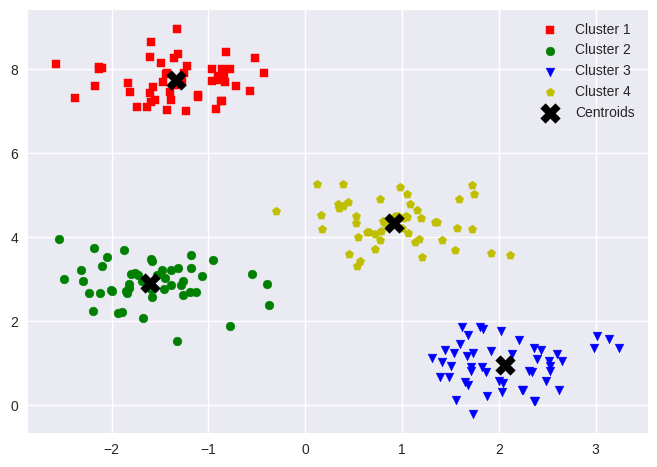

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km = km.fit_predict(x)
plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=40, c='r', marker='s',label='Cluster 1')
plt.scatter(x[y_km==1, 0], x[y_km==1, 1], s=40, c='g', marker='o',label='Cluster 2')
plt.scatter(x[y_km==2, 0], x[y_km==2, 1], s=40, c='b', marker='v',label='Cluster 3')
plt.scatter(x[y_km==3, 0], x[y_km==3, 1], s=40, c='y', marker='p',label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200,marker='X', c='k', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()


Perintah **from sklearn.cluster import KMeans**: Mengimpor kelas KMeans dari modul sklearn.cluster. Kelas ini digunakan untuk melakukan klasterisasi menggunakan algoritma K-Means.

Perintah **km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)**: Membuat objek km dari kelas KMeans. Argumen-argumen yang diberikan menentukan jumlah klaster (n_clusters), metode inisialisasi klaster (init), jumlah percobaan inisialisasi (n_init), jumlah iterasi maksimum (max_iter), toleransi untuk konvergensi (tol), dan nilai seed acak (random_state).

Perintah **y_km = km.fit_predict(x)**: Melakukan klasterisasi pada data x menggunakan metode fit_predict. Menghasilkan array y_km yang berisi label klaster untuk setiap sampel data dalam x.

Perintah **plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=40, c='r', marker='s', label='Cluster 1')**: Membuat scatter plot untuk sampel-sampel dalam klaster 0 (y_km==0) dengan warna merah (c='r'), bentuk marker persegi (marker='s'), dan label 'Cluster 1'.

Perintah **plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200, marker='X', c='k', label='Centroids')**: Membuat scatter plot untuk pusat-pusat klaster (km.cluster_centers_) dengan warna hitam (c='k'), bentuk marker X (marker='X'), dan label 'Centroids'.

Perintah **plt.legend(scatterpoints=1)**: Menampilkan legenda pada plot dengan menggunakan scatter points (scatterpoints=1).
Legenda ini akan memberikan informasi tentang klaster dan pusat klaster.

Petintah **plt.show()**: Menampilkan plot yang telah dibuat.

**The Elbow Method**
Theorem: if k increases, the within-cluster SSE (“distortion”) will decrease.
Inertia is calculated by measuring the distance between each data point and its centroid.

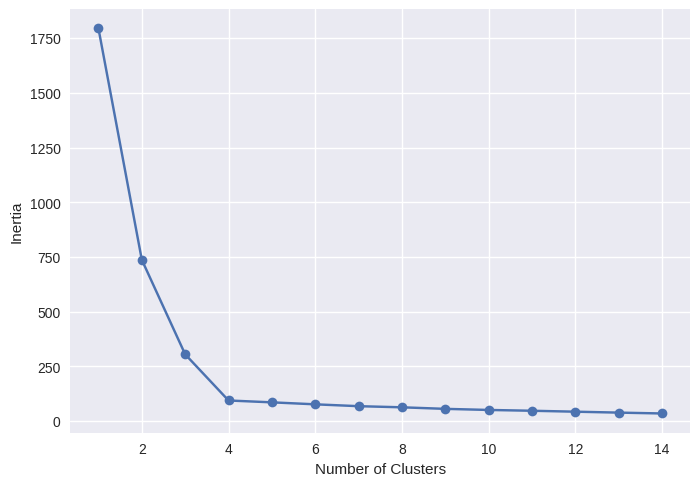

In [ ]:
inertias = []
for i in range(1, 15):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
  km.fit(x)
  inertias.append(km.inertia_)

plt.plot(range(1,15), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Perintah **inertias = []**: Membuat list kosong inertias yang akan digunakan untuk menyimpan nilai inertia untuk setiap jumlah klaster.

Perintah **for i in range(1, 15):**:
Melakukan iterasi dari 1 hingga 14 (tidak termasuk 15) untuk mencoba berbagai jumlah klaster.

Perintah **km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)**: Membuat objek km dari kelas KMeans dengan jumlah klaster sebanyak i (sesuai iterasi). Argumen-argumen yang diberikan adalah konfigurasi yang sama seperti sebelumnya.

Perintah **km.fit(x)**: Melakukan klasterisasi pada data x menggunakan metode fit.

Perintah **inertias.append(km.inertia_)**: Menyimpan nilai inertia dari objek km ke dalam list inertias.

Perintah **plt.plot(range(1,15), inertias, marker='o')**: Membuat plot garis menggunakan plt.plot dengan sumbu x berupa range dari 1 hingga 14 (jumlah klaster) dan sumbu y berupa nilai inertia dari setiap jumlah klaster.
Argumen marker='o' menambahkan marker lingkaran pada setiap titik data pada plot.

Perintah **plt.xlabel('Number of Clusters')**: Menambahkan label sumbu x dengan teks "Number of Clusters".

Perintah **plt.ylabel('Inertia')**: Menambahkan label sumbu y dengan teks "Inertia".

Perintah **plt.show()**: Menampilkan plot yang telah dibuat.

Another example for KMeans

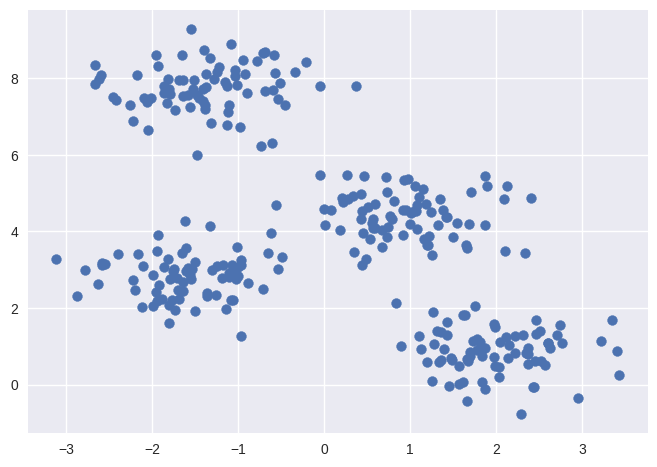

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60,
random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Perintah **from sklearn.datasets import make_blobs**: Mengimpor fungsi make_blobs dari modul sklearn.datasets. Fungsi ini digunakan untuk menghasilkan dataset sintetis yang terdiri dari beberapa klaster dengan distribusi normal.

Perintah **X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)**: Memanggil fungsi make_blobs dengan argumen-argumen yang diberikan.
n_samples=300 menentukan jumlah total sampel yang akan dibuat. centers=4 menentukan jumlah klaster yang akan dibentuk. cluster_std=0.60 menentukan standar deviasi dari masing-masing klaster. random_state=0 menentukan seed acak untuk memastikan reproducibility.

Perintah **plt.scatter(X[:, 0], X[:, 1], s=50)**:Membuat scatter plot menggunakan plt.scatter dengan koordinat x diambil dari kolom pertama (X[:, 0]) dan koordinat y diambil dari kolom kedua (X[:, 1]). Argumen s=50 menentukan ukuran marker dalam plot.

Perintah **plt.show()**: Menampilkan plot yang telah dibuat.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

Perintah **from sklearn.cluster import KMeans**: Mengimpor kelas KMeans dari modul sklearn.cluster. Kelas ini menyediakan implementasi algoritma K-Means untuk klasterisasi data.

Perintah **kmeans = KMeans(n_clusters=4)**: Membuat objek kmeans dari kelas KMeans dengan argumen n_clusters=4. n_clusters=4 menentukan jumlah klaster yang ingin dibentuk oleh algoritma K-Means.

Perintah **kmeans.fit(X)**: Melakukan proses klasterisasi pada dataset X menggunakan metode fit dari objek kmeans. Algoritma K-Means akan mengelompokkan data dalam X menjadi 4 klaster berdasarkan pola yang ada dalam data.

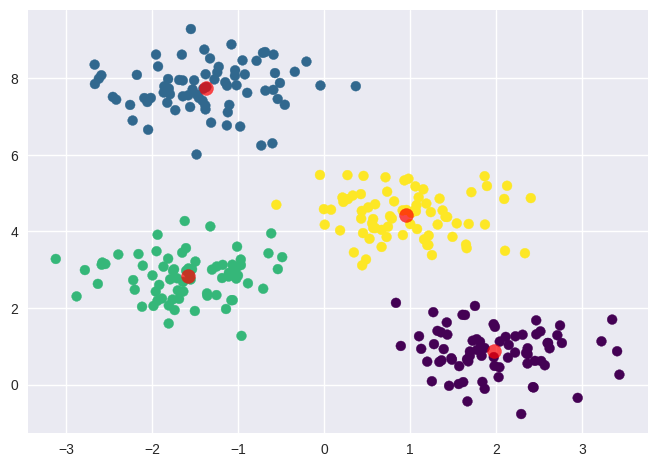

In [ ]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
pusat = kmeans.cluster_centers_
plt.scatter(pusat[:, 0], pusat[:, 1], c='red', s=100, alpha=0.7);

Perintah **y_kmeans = kmeans.predict(X)**: Menggunakan objek kmeans yang telah dilatih sebelumnya untuk melakukan prediksi pada dataset X. Menghasilkan label klaster untuk setiap sampel dalam X berdasarkan model K-Means yang telah dilatih.

Perintah **plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')**: Membuat scatter plot menggunakan plt.scatter dengan koordinat x diambil dari kolom pertama X[:, 0] dan koordinat y diambil dari kolom kedua X[:, 1]. Argumen c=y_kmeans mengatur warna dari setiap titik dalam plot berdasarkan label klaster yang diprediksi. Argumen s=50 menentukan ukuran marker dalam plot. Argumen cmap='viridis' menentukan skema warna yang akan digunakan.

Perintah **pusat = kmeans.cluster_centers_**: Menyimpan koordinat pusat (centroid) dari setiap klaster yang dihasilkan oleh K-Means dalam variabel pusat.

Perintah **plt.scatter(pusat[:, 0], pusat[:, 1], c='red', s=100, alpha=0.7)**: Membuat scatter plot untuk pusat klaster menggunakan plt.scatter dengan koordinat x diambil dari kolom pertama pusat[:, 0] dan koordinat y diambil dari kolom kedua pusat[:, 1]. Argumen c='red' mengatur warna marker pusat klaster menjadi merah. Argumen s=100 menentukan ukuran marker pusat klaster. Argumen alpha=0.7 mengatur tingkat transparansi marker pusat klaster.

Perintah **plt.show()**: Menampilkan plot yang telah dibuat.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

Perintah **from sklearn.cluster import KMeans**: Mengimpor kelas KMeans dari modul sklearn.cluster.
Kelas ini menyediakan implementasi algoritma K-Means untuk klasterisasi data.

Perintah **kmeans = KMeans(n_clusters=6)**: Membuat objek kmeans dari kelas KMeans dengan argumen n_clusters=6. n_clusters=6 menentukan jumlah klaster yang ingin dibentuk oleh algoritma K-Means.

In [ ]:
inersia = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inersia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Paerintah **inertia = []**: Membuat sebuah list kosong dengan nama inertia untuk menyimpan nilai inersia.

Perintah **for i in range(1, 10):**: Menginisialisasi loop untuk i dari 1 hingga 9 (inklusif). Ini menentukan berbagai nilai n_clusters yang akan diuji.

Perintah **kmeans = KMeans(n_clusters=i)**: Membuat objek kmeans dari kelas KMeans dengan argumen n_clusters=i. n_clusters=i menentukan jumlah klaster yang ingin dibentuk oleh algoritma K-Means, di mana i adalah nilai yang sedang diuji dalam loop.

Perintah **kmeans.fit(X)**: Melatih model K-Means menggunakan metode fit pada data X.

Perintah **inertia.append(kmeans.inertia_)**: Menambahkan nilai inersia dari model K-Means yang dilatih ke dalam list inertia. Nilai inersia menunjukkan sejauh mana titik-titik dalam setiap klaster cenderung berada dekat dengan pusat klasternya.

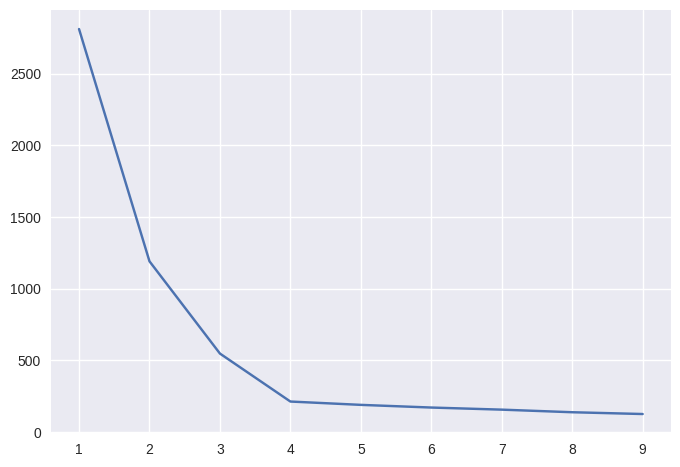

In [ ]:
plt.plot(range(1,10),inersia)
plt.show()

Perintah **plt.plot(range(1,10), inersia)**: Menggunakan plt.plot untuk membuat plot garis.
Argumen pertama, range(1,10), adalah nilai x yang menunjukkan jumlah klaster yang diuji.
Argumen kedua, inersia, adalah nilai y yang menunjukkan inersia yang dikumpulkan sebelumnya.

Perintah **plt.show()**: Menampilkan plot yang telah dibuat.

KMean6 with 6 cluster

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

Perintah **from sklearn.datasets import make_moons**: Mengimpor fungsi make_moons dari modul sklearn.datasets. Fungsi ini digunakan untuk menghasilkan dataset sintetis dengan pola bentuk bulan sabit.

Perintah **X, y = make_moons(200, noise=.05, random_state=0)**: Memanggil fungsi make_moons dengan argumen berikut:

200: Jumlah sampel yang akan dihasilkan.
noise=.05: Tingkat kebisingan yang ditambahkan ke dataset. Nilai ini mengontrol seberapa acak dan tumpang tindih pola bulan sabit yang dihasilkan.

random_state=0: Nilai seed yang digunakan untuk menghasilkan dataset yang konsisten secara acak.

Fungsi ini mengembalikan dua nilai:

X: Array numpy yang berisi fitur-fitur (koordinat x dan y) dari setiap sampel.

y: Array numpy yang berisi label kelas dari setiap sampel (0 atau 1).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


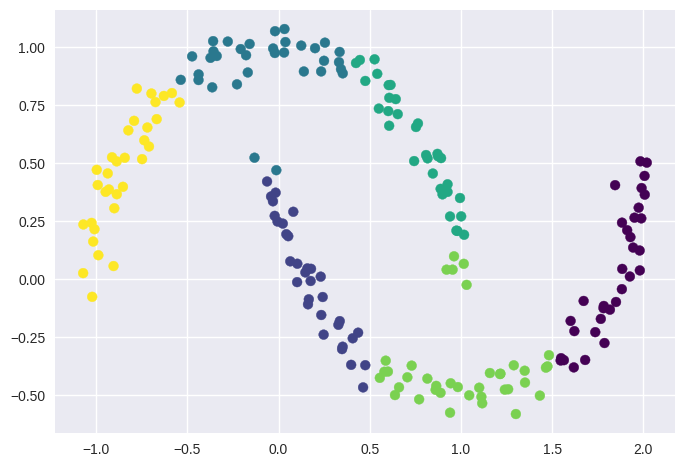

In [ ]:
label = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis');

Peritah **label = KMeans(6, random_state=0).fit_predict(X)**: Membuat objek KMeans dengan 6 klaster dan nilai random_state=0. Menggunakan metode fit_predict pada objek KMeans untuk melakukan klasterisasi pada dataset X. Menghasilkan array label yang berisi label klaster yang ditetapkan untuk setiap sampel dalam dataset.

Perintah **plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis')**: Menggunakan plt.scatter untuk membuat plot scatter. Argumen pertama, X[:, 0], adalah nilai x dari dataset X. Argumen kedua, X[:, 1], adalah nilai y dari dataset X. Argumen ketiga, c=label, menentukan warna untuk setiap titik scatter berdasarkan label klaster yang ditetapkan. Argumen keempat, s=50, menentukan ukuran titik scatter. Argumen kelima, cmap='viridis', menentukan skema warna yang digunakan.

**Spectral Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


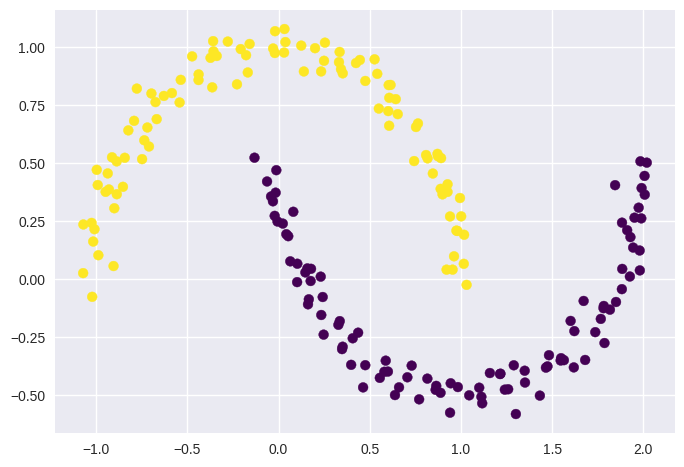

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Perita **from sklearn.cluster import SpectralClustering**: Mengimport kelas SpectralClustering dari modul sklearn.cluster.

Perintah **model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')**: Membuat objek SpectralClustering dengan 2 klaster. Argumen affinity='nearest_neighbors' menentukan metode afinitas yang digunakan untuk menghitung jarak antara sampel-sampel. Argumen assign_labels='kmeans' menentukan metode yang digunakan untuk menetapkan label klaster kepada sampel-sampel.

Perintah **labels = model.fit_predict(X)**: Menggunakan metode fit_predict pada objek SpectralClustering untuk melakukan klasterisasi pada dataset X. Menghasilkan array labels yang berisi label klaster yang ditetapkan untuk setiap sampel dalam dataset.

Perintah **plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')**: Menggunakan plt.scatter untuk membuat plot scatter.
Argumen pertama, X[:, 0], adalah nilai x dari dataset X. Argumen kedua, X[:, 1], adalah nilai y dari dataset X. Argumen ketiga, c=labels, menentukan warna untuk setiap titik scatter berdasarkan label klaster yang ditetapkan. Argumen keempat, s=50, menentukan ukuran titik scatter. Argumen kelima, cmap='viridis', menentukan skema warna yang digunakan.

**DBScan**

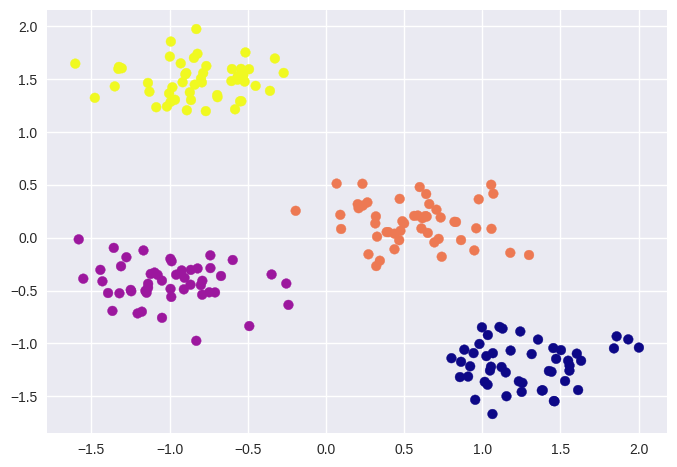

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=3)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()


Perintah **from sklearn.cluster import DBSCAN**: Mengimport kelas DBSCAN dari modul sklearn.cluster.

Perintah **from sklearn.preprocessing import StandardScaler**: Mengimport kelas StandardScaler dari modul sklearn.preprocessing.

Perintah **scaler = StandardScaler()**: Membuat objek StandardScaler yang akan digunakan untuk melakukan penskalaan data.

Perintah **newX = scaler.fit_transform(x)**: Menggunakan metode fit_transform pada objek StandardScaler untuk melakukan penskalaan data pada dataset x. Menghasilkan dataset newX yang sudah tereskala.

Perintah **dbscan = DBSCAN(eps=0.35, min_samples=3)**: Membuat objek DBSCAN dengan parameter eps=0.35 yang menentukan jarak maksimum antara dua sampel agar dapat dianggap tetangga, dan min_samples=3 yang menentukan jumlah minimum sampel dalam suatu klaster.

Perintah **y_db = dbscan.fit_predict(newX)**: Menggunakan metode fit_predict pada objek DBSCAN untuk melakukan klasterisasi pada dataset newX. Menghasilkan array y_db yang berisi label klaster yang ditetapkan untuk setiap sampel dalam dataset.

Perintah **plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')**: Menggunakan plt.scatter untuk membuat plot scatter. Argumen pertama, newX[:,0], adalah nilai x yang telah tereskala dari dataset newX. Argumen kedua, newX[:,1], adalah nilai y yang telah tereskala dari dataset newX. Argumen ketiga, c=y_db, menentukan warna untuk setiap titik scatter berdasarkan label klaster yang ditetapkan.
Argumen keempat, cmap='plasma', menentukan skema warna yang digunakan.

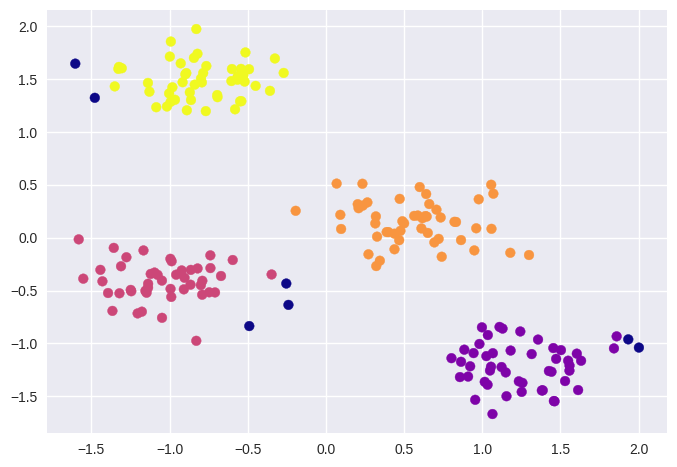

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=10)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()


Perintah **from sklearn.cluster import DBSCAN**: Mengimport kelas DBSCAN dari modul sklearn.cluster.

Perintah **from sklearn.preprocessing import StandardScaler**: Mengimport kelas StandardScaler dari modul sklearn.preprocessing.

Perintah **scaler = StandardScaler()**:
Membuat objek StandardScaler yang akan digunakan untuk melakukan penskalaan data.

Perintah **newX = scaler.fit_transform(x)**: Menggunakan metode fit_transform pada objek StandardScaler untuk melakukan penskalaan data pada dataset x. Menghasilkan dataset newX yang sudah tereskala.

Perintah **dbscan = DBSCAN(eps=0.35, min_samples=10)**: Membuat objek DBSCAN dengan parameter eps=0.35 yang menentukan jarak maksimum antara dua sampel agar dapat dianggap tetangga, dan min_samples=10 yang menentukan jumlah minimum sampel dalam suatu klaster.

Perintah **y_db = dbscan.fit_predict(newX)**: Menggunakan metode fit_predict pada objek DBSCAN untuk melakukan klasterisasi pada dataset newX. Menghasilkan array y_db yang berisi label klaster yang ditetapkan untuk setiap sampel dalam dataset.

Perintah **plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')**: Menggunakan plt.scatter untuk membuat plot scatter. Argumen pertama, newX[:,0], adalah nilai x yang telah tereskala dari dataset newX. Argumen kedua, newX[:,1], adalah nilai y yang telah tereskala dari dataset newX. Argumen ketiga, c=y_db, menentukan warna untuk setiap titik scatter berdasarkan label klaster yang ditetapkan.
Argumen keempat, cmap='plasma', menentukan skema warna yang digunakan.